In [65]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random

%matplotlib inline

1. Загрузить файл auto.csv

In [66]:
df=pd.read_csv('auto.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [67]:
df.shape

(205, 26)

2. Рассчитать основные статистики для переменных(среднее, медиана, мода, мин/макс, сред. отклонение)



In [68]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [69]:
print('Мат ожидание =', statistics.mean(df['price']))
print('Медиана =', statistics.median(df['price']))
print('Мода =', statistics.mode(df['price']))
print('Минимум =', min(df['price']))
print('Максимум =', max(df['price']))
print('Стандартное отклонение =', statistics.pstdev(df['price']))

Мат ожидание = 13312.71219512195
Медиана = 10295
Мода = 6785
Минимум = 5118
Максимум = 45400
Стандартное отклонение = 8082.686173881863


In [70]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Пустые значения отсутствуют

3. Рассчитать и визуализировать корреляционную матрицу для переменных



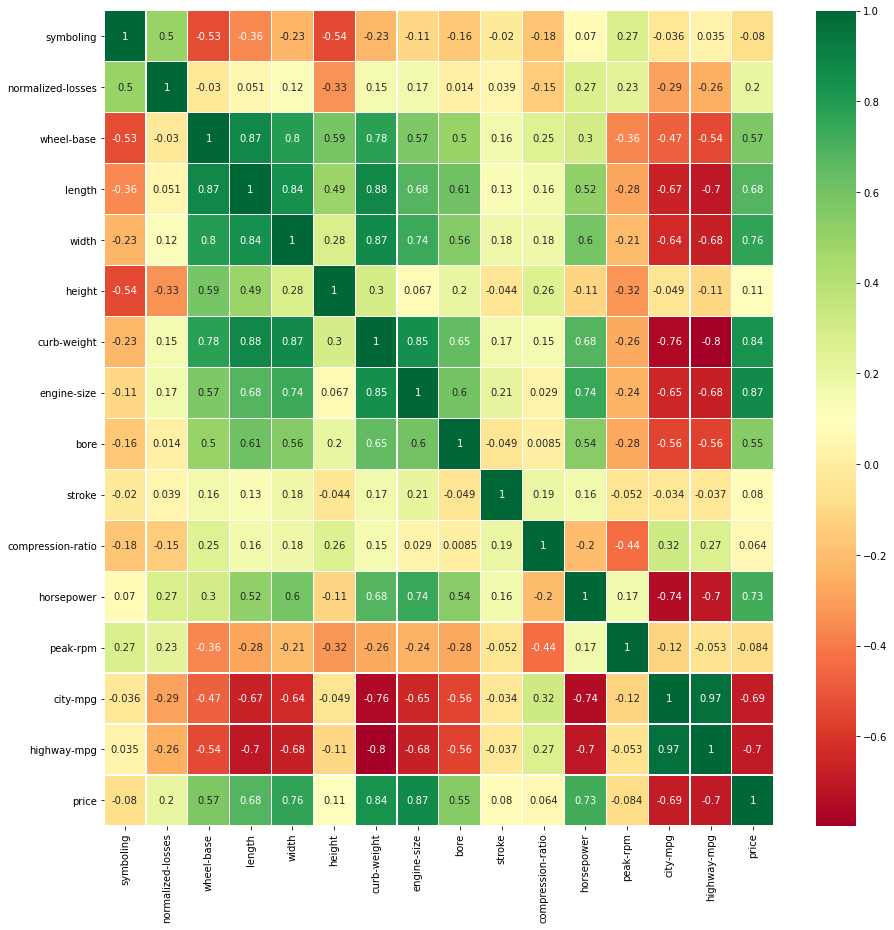

In [71]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis



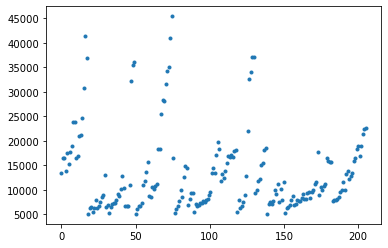

In [72]:
len_column = len(df['price']) 
x = np.linspace(0, len_column, len_column)
plt.scatter(x, df['price'], marker='.')

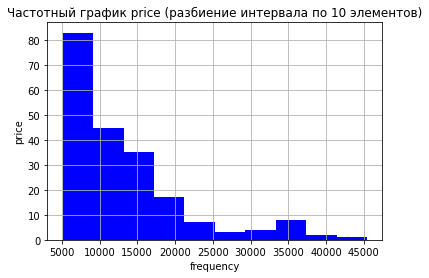

In [73]:
n, bins, patches = plt.hist(df['price'], 10, facecolor='b')

plt.xlabel('frequency')
plt.ylabel('price')
plt.title('Частотный график price (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Геометрическое распределение

In [78]:
from scipy.stats import kurtosis, skew

print( 'kurtosis: {}'.format( kurtosis(df['price']) ))
print( 'skewness: {}'.format( skew(df['price']) ))

kurtosis: 2.848082544390688
skewness: 1.7534486514523662


5. Визуализировать несколько взаимосвязей между переменными



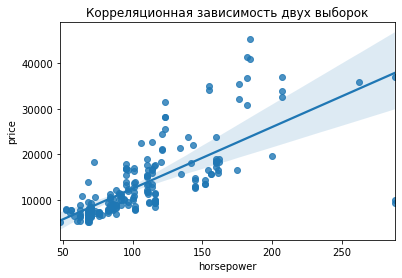

In [80]:
horsepower = df['horsepower']
price = df['price']
# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x = horsepower, y = price, data=df, fit_reg=True)
plt.xlabel('horsepower') 
plt.ylabel('price')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

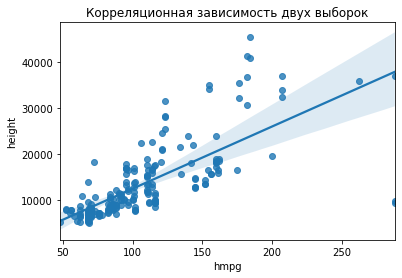

In [82]:
hmpg = df['highway-mpg']
height = df['height']
# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x = horsepower, y = price, data=df, fit_reg=True)
plt.xlabel('hmpg')
plt.ylabel('height')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

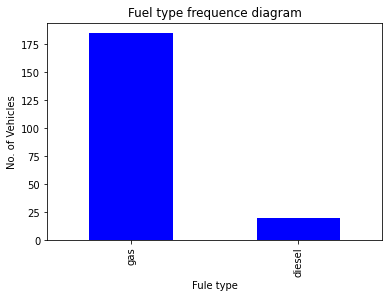

In [85]:
df['fuel-type'].value_counts().plot(kind='bar',color='b')
plt.title("Fuel type frequence diagram")
plt.ylabel('No. of Vehicles')
plt.xlabel('Fule type');

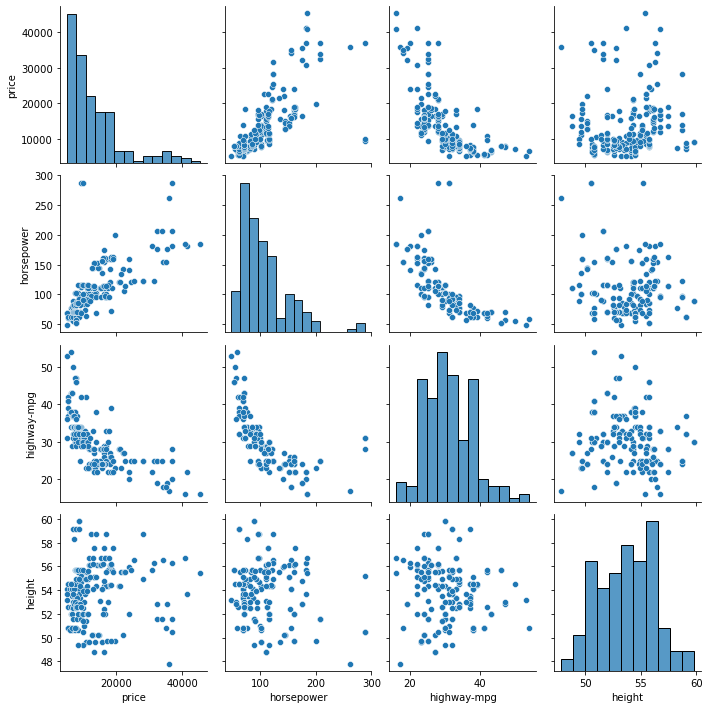

In [86]:
sns_plot = sns.pairplot(
    df[['price', 'horsepower', 'highway-mpg', 'height']])
sns_plot

6. Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.



H0 = Макс скорость на бензине такая же, как и на дизеле. highway mpg - макс скорость. fuel type - тип двигателя


In [89]:
d1 = df[df['fuel-type']=='gas']['highway-mpg']
d2 = df[df['fuel-type']=='diesel']['highway-mpg']

print(stats.ttest_ind(d1, d2))

Ttest_indResult(statistic=-2.7782750192973515, pvalue=0.005977403875730944)


C:\Users\ilgam\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ilgam\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


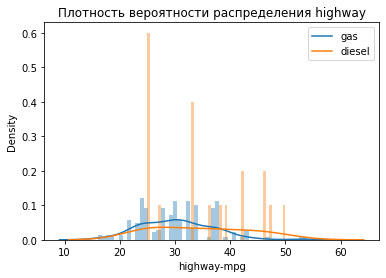

In [90]:
sns.distplot(d1, 50)
sns.distplot(d2, 50)
plt.title('Плотность вероятности распределения highway')
plt.legend(['gas', 'diesel'])
plt.show()

По графику видно разницу между данными. pvalue=0.0059 < 0.05. Гипотеза отвергается, имеется стаитческое различие между машинами на газе и дизеле

H0 = Седан и хетчбек стоят одинаково. body-style - тип кузова, price - стоимость

In [91]:
d3 = df[df['body-style']=='hatchback']['price']
d4 = df[df['body-style']=='sedan']['price']

print(stats.ttest_ind(d3, d4))

Ttest_indResult(statistic=-3.239840854617099, pvalue=0.0014480881997921526)


C:\Users\ilgam\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ilgam\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


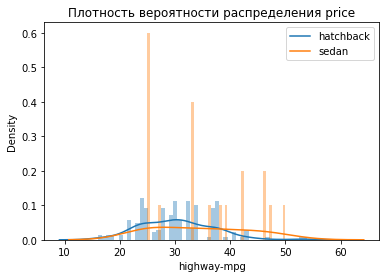

In [92]:
sns.distplot(d1, 50)
sns.distplot(d2, 50)
plt.title('Плотность вероятности распределения price')
plt.legend(['hatchback', 'sedan'])
plt.show()

pvalue=0.001448 < 0.05, по графику видим сильную разницу между переменными. Гипотеза отвергается, имеется статистическое различие между данными

H0 = И переднериводные, и заднеприводные машины стоят одинаково. drive-wheels - привод машины, price - стоимость


In [93]:
d5 = df[df['drive-wheels']=='fwd']['price']
d6 = df[df['drive-wheels']=='rwd']['price']

print(stats.ttest_ind(d5, d6))

Ttest_indResult(statistic=-11.657566836950782, pvalue=3.80874683861172e-24)


C:\Users\ilgam\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ilgam\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


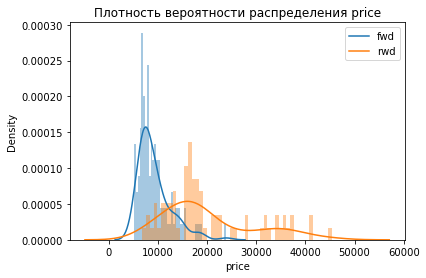

In [94]:
sns.distplot(d5, 50)
sns.distplot(d6, 50)
plt.title('Плотность вероятности распределения price')
plt.legend(['fwd', 'rwd'])
plt.show()

pvalue=3.80874683861172e-24 < 0.05. Гипотезу отвергаем. По графику видим сильное различие между переднеприводными и заднеприводными машинами. Заднеприводные оказались дешевле, либо ограниченное количество данных выдает такую статистику